Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года. 

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков». 

Инструкция по выполнению проекта 

### Шаг 1. Откройте файл с данными и изучите общую информацию 

Путь к файлу: /datasets/games.csv. 

#### Шаг 2. Подготовьте данные 

Замените названия столбцов (приведите к нижнему регистру); 

Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему; 

Обработайте пропуски при необходимости: 

Объясните, почему заполнили пропуски определённым образом или почему не стали это делать; 

Опишите причины, которые могли привести к пропускам; 

Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать; 

Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец. 

### Шаг 3. Проведите исследовательский анализ данных 

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды? 

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы? 

Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. 

Не учитывайте в работе данные за предыдущие годы. 

Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ. 

Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат. 

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы. 

Соотнесите выводы с продажами игр на других платформах. 

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами? 

### Шаг 4. Составьте портрет пользователя каждого региона 

Определите для пользователя каждого региона (NA, EU, JP): 

Самые популярные платформы (топ-5). Опишите различия в долях продаж. 

Самые популярные жанры (топ-5). Поясните разницу. 

Влияет ли рейтинг ESRB на продажи в отдельном регионе? 

### Шаг 5. Проверьте гипотезы 

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; 

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. 

Задайте самостоятельно пороговое значение alpha. 

Поясните: 

Как вы сформулировали нулевую и альтернативную гипотезы; 

Какой критерий применили для проверки гипотез и почему. 

Шаг 6. Напишите общий вывод 

Оформление: Выполните задание в Jupyter Notebook. Заполните программный код в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки. 

### Описание данных 

Name — название игры 

Platform — платформа 

Year_of_Release — год выпуска 

Genre — жанр игры 

NA_sales — продажи в Северной Америке (миллионы проданных копий) 

EU_sales — продажи в Европе (миллионы проданных копий) 

JP_sales — продажи в Японии (миллионы проданных копий) 

Other_sales — продажи в других странах (миллионы проданных копий) 

Critic_Score — оценка критиков (максимум 100) 

User_Score — оценка пользователей (максимум 10) 

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. 

Данные за 2016 год могут быть неполными. 
 

In [35]:
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [36]:
try:
    df = pd.read_csv('games.csv') # для запуска кода локально
except:
    df = pd.read_csv('/datasets/games.csv') # для запуска кода в jupyter hub
    
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Вывод:

Назание столбцов записано в разных регистрах

Есть пропущенные значения в разных столбцах




### Шаг 2. Подготовьте данные 

Замените названия столбцов (приведите к нижнему регистру); 

Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему; 

Обработайте пропуски при необходимости: 

Объясните, почему заполнили пропуски определённым образом или почему не стали это делать; 

Опишите причины, которые могли привести к пропускам; 

Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать; 

Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец. 

#### Замените названия столбцов (приведите к нижнему регистру)

In [37]:
df.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 
              'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Изменил регистр в название столбцов

#### Обработайте пропуски при необходимости:

Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;

Опишите причины, которые могли привести к пропускам;

In [38]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [39]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [40]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [41]:
df.duplicated().sum() 
# дубликатов нет

0

In [42]:
df.dropna(subset = ['name', 'year_of_release'],inplace = True)
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [43]:
df['rating'] = df['rating'].fillna('no_rating')
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating                0
dtype: int64

#### Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

In [44]:
df['year_of_release'] = df['year_of_release'].astype('int')
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating


Данные в столбце год выпуска привел к типу int

#### Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать

To Be Determined - нашел в интернете это сокращение. Думаю это что оценка еще не определена или не хватило оценок для расчета оценок пользователя. Исправлю это сокращение на пропущенное значение. 

In [45]:
df['user_score'] = df['user_score'].replace('tbd', 0) 
df['user_score'].value_counts()

0      2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
0.5       2
0.6       2
0.9       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

##### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [46]:
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,31.38


Посчитал суммарные продажи по всем регионал и добавил в столбец 'all_sales'

### Вывод:

-заменил названия в столбцах 

-строки с пропущнным значение в годе выпуска, жанре удалил

-преобразоват тип данных в годе выпуска к int

-посчитал суммарные продажи по всем регионал и доавил в столбец 'all_sales'

### Шаг 3. Проведите исследовательский анализ данных 

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды? 

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы? 

Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. 

Не учитывайте в работе данные за предыдущие годы. 

Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ. 

Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат. 

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы. 

Соотнесите выводы с продажами игр на других платформах. 

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами? 

In [47]:
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,31.38


#### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [48]:
df.groupby('year_of_release')['year_of_release'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64

До 2009 года шел рост выпусков игр каждый год. Затем выпуск игр стал уменьшаться. 

#### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [49]:
top_10 = df.pivot_table(index='platform', values='all_sales', aggfunc='sum').sort_values(by='all_sales', ascending = False)
display(top_10)
top_10 = top_10.query('all_sales > 256')
display(top_10) # отсортировал топ 10 по продажам
top = list(top_10.index) # создал список с именами платформ топ 10
display(top)
df_top = df[df['platform'].isin(top)] # выбрал данные по топ 10 платформам
df_top

,all_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


,all_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,NaN,NaN,no_rating,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,no_rating,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,no_rating,0.01


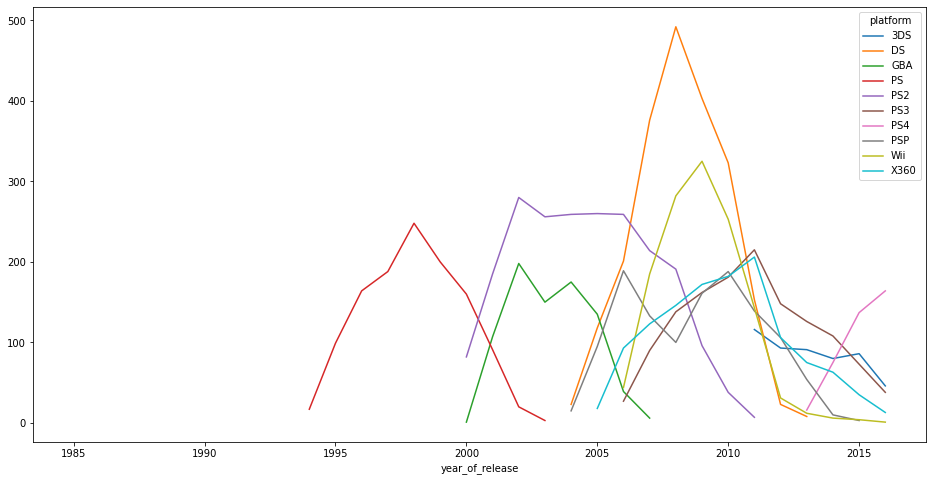

In [50]:
top_10_years = df_top.pivot_table(index='year_of_release', columns='platform', values='name', aggfunc='count')
top_10_years.plot(kind='line', figsize=(16,8));

Выбрал Топ 10 платформ по продажам и построил график количества выхода игр на данной платформе.

Из графика видно что в среднем срок жизни одной платформы 10 лет.

#### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

In [51]:
df_actual = df.query('year_of_release > 2013')
df_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       981 non-null    object 
 10  rating           1689 non-null   object 
 11  all_sales        1689 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 171.5+ KB


Актуальный период взял с 2014.


#### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

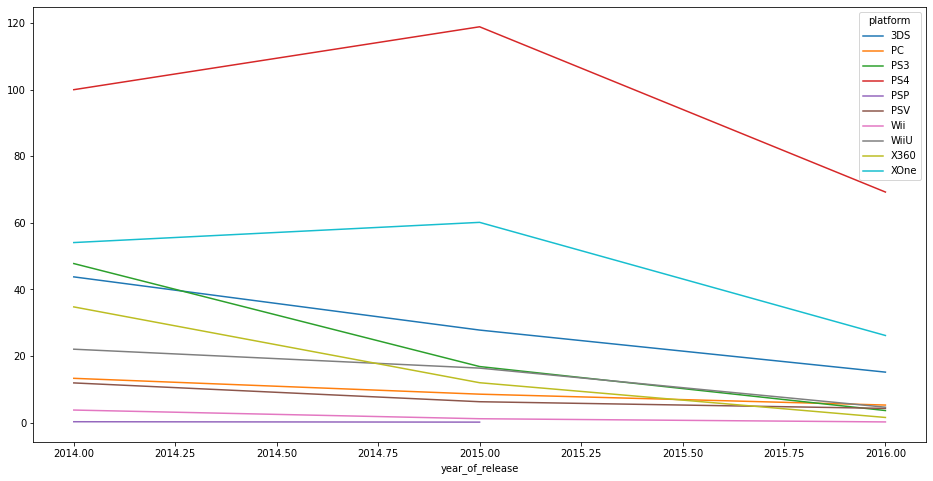

In [52]:
df_profit = df_actual.pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc='sum')
df_profit.plot(kind='line', figsize=(16,8));

PS4 и XOne на данный момент растут и считаю потенциально прибыльными на ближайшие годы.


#### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

(0.0, 1.0)

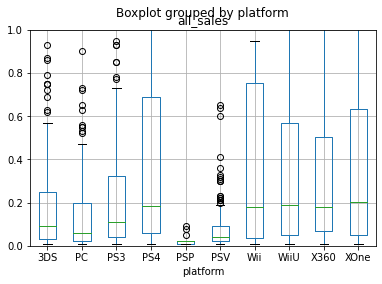

In [53]:
df_actual.boxplot(column='all_sales', by='platform');
plt.ylim(0, 1)

Показатели по перспективным платформам PS4 и XOne практически одинаковые.

#### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.


Одна из самых популярных платформ по общим продажам PS3. По ней буду строить диаграмму.

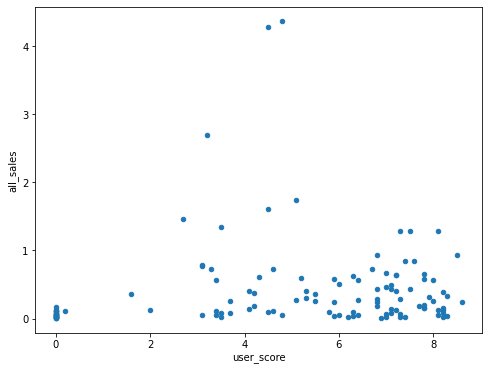

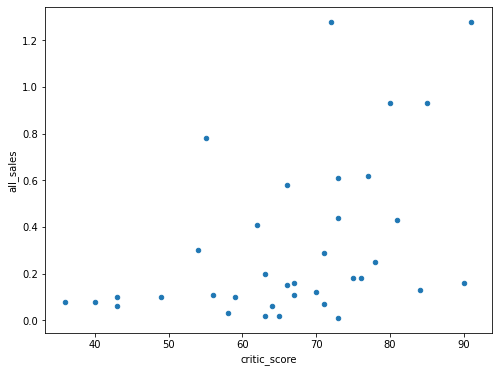

In [54]:
df_ps3 = df_actual[df_actual['platform'] == 'PS3']
# в user_score есть данные tbd, о появление позже отзывов, поэтому при построение диаграмм, строки с этим значение уберу.
df_ps3 = df_ps3[df_ps3['user_score'] != 'tbd'] 
df_ps3['user_score'] = df_ps3['user_score'].astype(float) # тип данных с object исправлю на float

df_ps3.plot(x='user_score', y='all_sales', kind='scatter', figsize=(8, 6));
df_ps3.plot(x='critic_score', y='all_sales', kind='scatter', figsize=(8, 6));

In [55]:
display(df_ps3['user_score'].corr(df_ps3['all_sales']))
df_ps3['critic_score'].corr(df_ps3['all_sales'])

0.1138376265969687

0.44657460493190704

Из диаграммы рассеивания видно, чем больше отзывы и рейтинг платформы, тем больше продажи. 

Данные по корреляции не показывают такую зависимость.

#### Соотнесите выводы с продажами игр на других платформах.

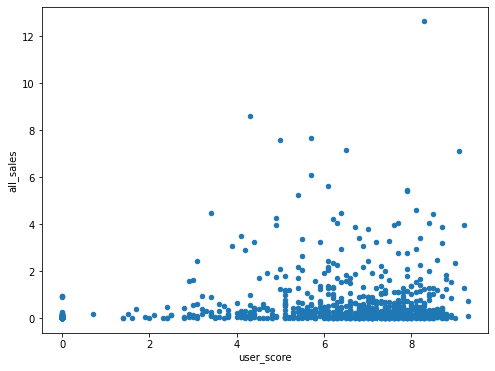

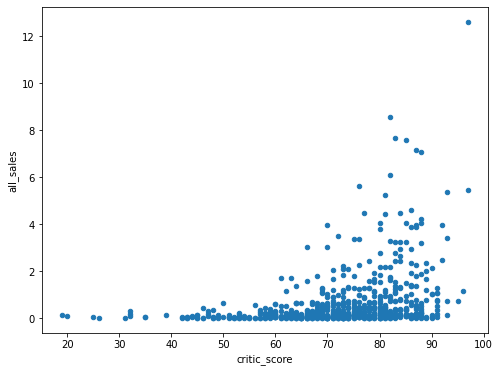

In [56]:
df_other = df_actual[df_actual['platform'] != 'PS3']
# в user_score есть данные tbd, о появление позже отзывов, поэтому при построение диаграмм, строки с этим значение уберу.
df_other = df_other[df_other['user_score'] != 'tbd'] 
df_other['user_score'] = df_other['user_score'].astype(float) # тип данных с object исправлю на float

df_other.plot(x='user_score', y='all_sales', kind='scatter', figsize=(8, 6));
df_other.plot(x='critic_score', y='all_sales', kind='scatter', figsize=(8, 6));

In [57]:
display(df_other['user_score'].corr(df_other['all_sales']))
df_other['critic_score'].corr(df_other['all_sales'])

0.0965166197046609

0.3277754715670541

По данным графиков из других платформ, также прямая зависимость увеличения продаж от увеличения оценок пользователей.

#### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [58]:
df_actual.groupby('genre')['all_sales'].mean().sort_values(ascending = False)

genre
Shooter         1.335469
Sports          0.680000
Platform        0.476053
Fighting        0.470333
Role-Playing    0.459005
Racing          0.398841
Misc            0.332301
Action          0.322068
Simulation      0.298409
Puzzle          0.157857
Strategy        0.107027
Adventure       0.094865
Name: all_sales, dtype: float64

### Вывод:

Выбрал потенциально прибыльные платформы на ближайшее время это PS4 и XOne.

Проверил как влияют на продажи внутри одной самой популярной платформы PS3 и остальных платформ отзывы пользователей и критиков. С помощью диаграмм выявил прямую зависимость лидирующих по продажам платформ от высоких оценок пользователей и критиков. Также много продаж игр с отсутствующими оценками пользователей и критиков.

Выделил самые прибыльный жанр игры - это Shooter. Самый не прибыльный жанр игр это Adventure.  

### Шаг 4. Составьте портрет пользователя каждого региона 

Определите для пользователя каждого региона (NA, EU, JP): 

Самые популярные платформы (топ-5). Опишите различия в долях продаж. 

Самые популярные жанры (топ-5). Поясните разницу. 

Влияет ли рейтинг ESRB на продажи в отдельном регионе? 

#### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [59]:
df_actual.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no_rating,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,no_rating,7.98


In [60]:
df_na = df_actual.pivot_table(index='platform', values='na_sales', aggfunc='mean').sort_values(by='na_sales', ascending = False)
df_eu = df_actual.pivot_table(index='platform', values='eu_sales', aggfunc='mean').sort_values(by='eu_sales', ascending = False)
df_jp = df_actual.pivot_table(index='platform', values='jp_sales', aggfunc='mean').sort_values(by='jp_sales', ascending = False)

display(df_na.head(5))
display(df_eu.head(5))
display(df_jp.head(5))

,na_sales
platform,
XOne,0.356447
WiiU,0.265205
PS4,0.262261
X360,0.254955
Wii,0.189091


,eu_sales
platform,
PS4,0.345851
Wii,0.235455
XOne,0.202851
WiiU,0.180137
X360,0.139550


,jp_sales
platform,
3DS,0.208679
WiiU,0.100137
PS3,0.051233
PSV,0.049288
PS4,0.039947


В разных регионах лидируют различные платформы. В Европе лидирует PS4, в Северной Америке XOne, в Японии свои лидеры.

#### Самые популярные жанры (топ-5). Поясните разницу.

In [61]:
df_na = df_actual.pivot_table(index='genre', values='na_sales', aggfunc='mean').sort_values(by='na_sales', ascending = False)
df_eu = df_actual.pivot_table(index='genre', values='eu_sales', aggfunc='mean').sort_values(by='eu_sales', ascending = False)
df_jp = df_actual.pivot_table(index='genre', values='jp_sales', aggfunc='mean').sort_values(by='jp_sales', ascending = False)

display(df_na.head(5))
display(df_eu.head(5))
display(df_jp.head(5))

,na_sales
genre,
Shooter,0.617344
Sports,0.286522
Fighting,0.207167
Platform,0.178684
Role-Playing,0.151448


,eu_sales
genre,
Shooter,0.511875
Sports,0.284037
Racing,0.204783
Platform,0.178947
Simulation,0.165909


,jp_sales
genre,
Role-Playing,0.140995
Fighting,0.106167
Platform,0.070789
Puzzle,0.066429
Simulation,0.052500


В Северной Америке и Европе схожи лидеры по жанрам. В Японии свои лидеры.

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [62]:
df_na = df_actual.pivot_table(index='rating', values='na_sales', aggfunc='mean').sort_values(by='na_sales', ascending = False)
df_eu = df_actual.pivot_table(index='rating', values='eu_sales', aggfunc='mean').sort_values(by='eu_sales', ascending = False)
df_jp = df_actual.pivot_table(index='rating', values='jp_sales', aggfunc='mean').sort_values(by='jp_sales', ascending = False)

display(df_na.head(5))
display(df_eu.head(5))
display(df_jp.head(5))

,na_sales
rating,
M,0.363849
E,0.231689
E10+,0.179622
T,0.143727
no_rating,0.086409


,eu_sales
rating,
M,0.352604
E,0.265114
E10+,0.141405
T,0.125720
no_rating,0.078705


,jp_sales
rating,
no_rating,0.075968
T,0.054539
E,0.040822
M,0.030226
E10+,0.024108


Самые большие продажи с рейтингом M и Е в Европе и Америке. В Японии лидируют игры без рейтинга.

### Вывод:

Исправил вывод:

В Северной Америке и Европе схожи лидеры по жанрам. В Японии свои лидеры.

Самые большие продажи с рейтингом M и Е в Европе и Америке. В Японии лидируют игры без рейтинга.

### Шаг 5. Проверьте гипотезы 

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; 

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. 

Задайте самостоятельно пороговое значение alpha. 

Поясните: 

Как вы сформулировали нулевую и альтернативную гипотезы; 

Какой критерий применили для проверки гипотез и почему. 

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Проверим гипотезу

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC равны

Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC не равны

In [63]:
df_tbd = df_actual[df_actual['user_score'] != 'tbd'] # неподсчитанные отзывы tbd исключу из исследования
df_tbd['user_score'] = df_tbd['user_score'].astype(float) # тип данный изменю на float
df_xone = df_tbd[df_tbd['platform'] == 'XOne'] # продажи по XOne
df_xone.dropna(subset = ['user_score'],inplace = True)
df_pc = df_tbd[df_tbd['platform'] == 'PC'] # продажи по PC
df_pc.dropna(subset = ['user_score'],inplace = True)

/tmp/ipykernel_111/2277037166.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xone.dropna(subset = ['user_score'],inplace = True)
/tmp/ipykernel_111/2277037166.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pc.dropna(subset = ['user_score'],inplace = True)


In [64]:
# сравним дисперсии выборок
display(np.var(df_pc['user_score']))
np.var(df_xone['user_score'])

4.264389608779218

4.310201123450413

In [65]:
print('Средние пользовательские рейтинги платформ Xbox One: ',df_xone['user_score'].mean())
print('Средние пользовательские рейтинги платформ PC:',df_pc['user_score'].mean())

alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    df_xone['user_score'], 
    df_pc['user_score'], 
    equal_var = False)
# дисперсия разная. Буду использовать equal_var = False
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Средние пользовательские рейтинги платформ Xbox One:  6.182386363636363
Средние пользовательские рейтинги платформ PC: 6.050393700787401
p-значение:  0.585620476179421
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC практически равны.

#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Проверим гипотезу

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны.

Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») не равны.

In [66]:
df_action = df_tbd[df_tbd['genre'] == 'Action'] # продажи по XOne
df_action.dropna(subset = ['user_score'],inplace = True)
df_sports = df_tbd[df_tbd['genre'] == 'Sports'] # продажи по PC
df_sports.dropna(subset = ['user_score'],inplace = True)

/tmp/ipykernel_111/3076895450.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_action.dropna(subset = ['user_score'],inplace = True)
/tmp/ipykernel_111/3076895450.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sports.dropna(subset = ['user_score'],inplace = True)


In [67]:
# сравним дисперсии выборок
display(np.var(df_action['user_score']))
np.var(df_sports['user_score'])

6.448605517350686

5.017643987426074

In [68]:
print('Средние пользовательские рейтинги жанров Action: ',df_action['user_score'].mean())
print('Средние пользовательские рейтинги жанров Sports:',df_sports['user_score'].mean())

alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    df_action['user_score'], 
    df_sports['user_score'], 
    equal_var = False)
# дисперсия разная. Буду использовать equal_var = False
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Средние пользовательские рейтинги жанров Action:  5.958160237388724
Средние пользовательские рейтинги жанров Sports: 4.843795620437956
p-значение:  3.966812188237664e-06
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») не равны.

### Вывод:

Гипотезы были отвергнуты. 

Средние пользовательские рейтинги платформ Xbox One и PC не равны.

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») не равны.

## Общий вывод

Провел исследовательский анализ данных. Выявил актуальный период жизни платформы, равный 10 годам. 
 
Выявил две платформы которые будут потенциально прибыльным, это PS4 и XOne.
 
Выявил зависимость увеличения продаж от положительных оценок пользователей и критиков. Так же большие продажи занимают игры без оценок.

Выделил самый прибыльные жанр игры - это Shooter.

Проверил гипотезы: 

Средние пользовательские рейтинги платформ Xbox One и PC равны. Не получилось отвергнуть нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC практически равны.

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны. Гипотеза были отвергнуты.